In [4]:
import pandas as pd
import stats as st
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

names = ['COUGH', 'DRINK', 'EAT', 'READ', 'SIT', 'WALK']
col_names = ['timestamp', 'X', 'Y', 'Z']

def sliding_window(df_list: list[pd.DataFrame], window_size, offset, output_file):
    window_df = pd.DataFrame(columns=['time_past', 'mean_X', 'mean_Y', 'mean_Z', 'mean_distance', 'target'])
    for i in range(0, len(df_list)):
        rows, columns = df_list[i].shape
        for j in range(0, rows-window_size+1, offset):
            window = df_list[i].iloc[j:j+window_size]
            new_row_df = pd.DataFrame([[window['timestamp'].to_numpy()[-1]-window['timestamp'].to_numpy()[0], window['X'].mean(), window['Y'].mean(), window['Z'].mean(), window['distance'].mean(), window['target'].to_numpy()[0]]], columns=window_df.columns)
            window_df = pd.concat([window_df, new_row_df], ignore_index=True)
            
    return window_df
            
            

def distance(df: pd.DataFrame):
    return math.sqrt(float(df['X'])**2+float(df['Y'])**2 + float(df['Z'])**2)
    

frame_list = [pd.read_csv(name+'.csv') for name in names]


for i in range(0, len(frame_list)):
    frame_list[i] = frame_list[i].iloc[1:, :]
    frame_list[i].reset_index(drop=True, inplace=True)
    frame_list[i].columns = col_names
    frame_list[i]['distance'] = frame_list[i].apply(distance, axis=1)
    frame_list[i]['target'] = len(frame_list[i])*[i]
    frame_list[i]['target'] = [item+1 for item in frame_list[i]['target']]
    frame_list[i] = frame_list[i].astype(float)




In [70]:
for i in range(100, 1024, 100):
    window_df = sliding_window(frame_list, i, 16, "test.csv")

    X = window_df.iloc[:, :-1]
    y = window_df['target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)
    print("Accuracy Score for the ",i ,"-th sliding window size")
    print(knn.score(X, y))



/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  100 -th sliding window size
0.9837284215742959


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  200 -th sliding window size
0.9875704342061651


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  300 -th sliding window size
0.9953449709060682


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  400 -th sliding window size
0.9989994997498749


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  500 -th sliding window size
0.999330935853475


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  600 -th sliding window size
0.9996643732169828


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  700 -th sliding window size
0.9997474747474747


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  800 -th sliding window size
1.0


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  900 -th sliding window size
1.0


/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


Accuracy Score for the  1000 -th sliding window size
1.0


In [6]:
print([len(window_df[window_df['target'] == i]) for i in range(1, 7)])

[144, 564, 3273, 3064, 1642, 3081]


In [79]:
window_df = sliding_window(frame_list, 1000, 16, "test.csv")
print(window_df)
X = window_df.iloc[:, :-1]
y = window_df['target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.score(X, y))

/tmp/ipykernel_4393/1460650763.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


       time_past     mean_X    mean_Y    mean_Z  mean_distance  target
0       9755.859  -9.876531  1.200831  1.281559      10.049950     1.0
1       9755.859  -9.878446  1.204339  1.266928      10.050193     1.0
2       9755.859  -9.879334  1.203782  1.255102      10.049192     1.0
3       9755.859  -9.881770  1.202205  1.242242      10.049470     1.0
4       9755.859  -9.887150  1.194420  1.235012      10.052878     1.0
...          ...        ...       ...       ...            ...     ...
11763   9755.859  -9.994639 -0.352714  0.732295      10.272227     6.0
11764   9755.859 -10.000585 -0.324991  0.818448      10.285292     6.0
11765   9755.859 -10.003738 -0.327612  0.845414      10.289285     6.0
11766   9755.859  -9.994361 -0.341444  0.817793      10.277999     6.0
11767   9755.859  -9.984196 -0.380082  0.741906      10.266520     6.0

[11768 rows x 6 columns]
1.0


In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


array([[ 9.97131841e-01, -1.26130003e-03,  1.55212270e-04,
         1.67814823e-04,  1.28383231e-03],
       [ 9.97130006e-01, -1.26220675e-03,  1.55845547e-04,
         1.67225058e-04,  1.28471668e-03],
       [ 9.97135345e-01, -1.26149444e-03,  1.55408421e-04,
         1.64177411e-04,  1.28357427e-03],
       ...,
       [ 9.97226528e-01, -1.27876510e-03, -6.04783813e-05,
         1.16882855e-04,  1.31734569e-03],
       [ 9.97232253e-01, -1.27845987e-03, -5.93276174e-05,
         1.13731471e-04,  1.31622809e-03],
       [ 9.97244411e-01, -1.27742109e-03, -6.48491944e-05,
         9.87360740e-05,  1.31458278e-03]])

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print(cm)
 

1.0
[[ 24   0   0   0   0   0]
 [  0 117   0   0   0   0]
 [  0   0 639   0   0   0]
 [  0   0   0 614   0   0]
 [  0   0   0   0 342   0]
 [  0   0   0   0   0 618]]


In [75]:
from sklearn.model_selection import cross_val_score, cross_val_predict


k = 10
kf = KFold(n_splits=k, random_state=None)
 
result = cross_val_score(knn, X, y, cv = k)

 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9624466099098944


In [76]:
from sklearn.preprocessing import normalize
normalize(X, norm="max", axis=1)

array([[ 1.00000000e+00, -1.01236914e-03,  1.23088205e-04,
         1.31362995e-04,  1.03014503e-03],
       [ 1.00000000e+00, -1.01256549e-03,  1.23447720e-04,
         1.29863252e-04,  1.03016999e-03],
       [ 1.00000000e+00, -1.01265646e-03,  1.23390676e-04,
         1.28651066e-04,  1.03006734e-03],
       ...,
       [ 1.00000000e+00, -1.02540824e-03, -3.35810223e-05,
         8.66570589e-05,  1.05467753e-03],
       [ 1.00000000e+00, -1.02444700e-03, -3.49988798e-05,
         8.38258509e-05,  1.05352063e-03],
       [ 1.00000000e+00, -1.02340515e-03, -3.89593451e-05,
         7.60472352e-05,  1.05234402e-03]])

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print(cm)

1.0
[[ 24   0   0   0   0   0]
 [  0 117   0   0   0   0]
 [  0   0 639   0   0   0]
 [  0   0   0 614   0   0]
 [  0   0   0   0 342   0]
 [  0   0   0   0   0 618]]


In [78]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
# DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(knn, X, y, cv = k)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9624466099098944


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.score(X, y))
y_pred = knn.predict(X)
 
cm = confusion_matrix(y ,y_pred)
print(cm)

print(classification_report(y, y_pred))


1.0
[[ 144    0    0    0    0    0]
 [   0  564    0    0    0    0]
 [   0    0 3273    0    0    0]
 [   0    0    0 3064    0    0]
 [   0    0    0    0 1642    0]
 [   0    0    0    0    0 3081]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       144
         2.0       1.00      1.00      1.00       564
         3.0       1.00      1.00      1.00      3273
         4.0       1.00      1.00      1.00      3064
         5.0       1.00      1.00      1.00      1642
         6.0       1.00      1.00      1.00      3081

    accuracy                           1.00     11768
   macro avg       1.00      1.00      1.00     11768
weighted avg       1.00      1.00      1.00     11768



Avg accuracy: 0.9997889181470244


1.0
[[ 24   0   0   0   0   0]
 [  0 117   0   0   0   0]
 [  0   0 639   0   0   0]
 [  0   0   0 614   0   0]
 [  0   0   0   0 342   0]
 [  0   0   0   0   0 618]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00       117
         3.0       1.00      1.00      1.00       639
         4.0       1.00      1.00      1.00       614
         5.0       1.00      1.00      1.00       342
         6.0       1.00      1.00      1.00       618

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354



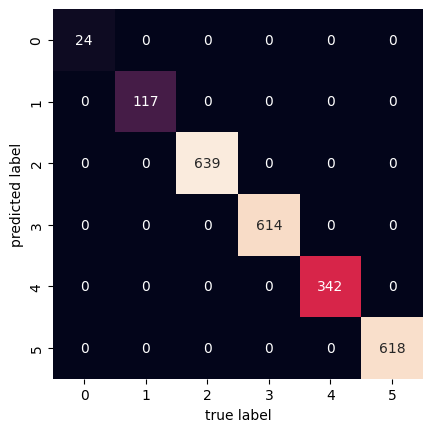

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test ,y_pred)
print(cm)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()



Avg accuracy: 0.9624466099098944
              precision    recall  f1-score   support

         1.0       0.35      1.00      0.52       144
         2.0       0.87      0.78      0.82       564
         3.0       0.95      1.00      0.97      3273
         4.0       0.91      0.84      0.87      3064
         5.0       1.00      1.00      1.00      1642
         6.0       0.97      0.94      0.95      3081

    accuracy                           0.93     11768
   macro avg       0.84      0.92      0.86     11768
weighted avg       0.94      0.93      0.93     11768

[[ 144    0    0    0    0    0]
 [   0  439    0  125    0    0]
 [   0    0 3257    0    0   16]
 [ 269   63  104 2566    0   62]
 [   0    0    0    0 1642    0]
 [   2    0   68  125    0 2886]]


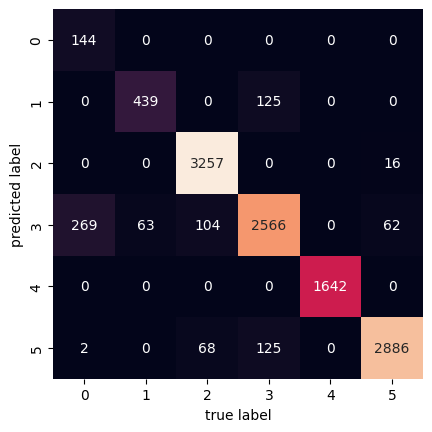

In [72]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
 
result = cross_val_score(knn, X, y, cv = k)
result_y_pred = cross_val_predict(knn, X, y)

print("Avg accuracy: {}".format(result.mean()))

print(classification_report(y, result_y_pred))
cm = confusion_matrix(y , result_y_pred)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [62]:
import seaborn as sns

DT = DecisionTreeClassifier()
tree = DT.fit(X, y)
y_pred = DT.predict(X)
print(DT.score(X, y))

print(classification_report(y, y_pred))

1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       144
         2.0       1.00      1.00      1.00       564
         3.0       1.00      1.00      1.00      3273
         4.0       1.00      1.00      1.00      3064
         5.0       1.00      1.00      1.00      1642
         6.0       1.00      1.00      1.00      3081

    accuracy                           1.00     11768
   macro avg       1.00      1.00      1.00     11768
weighted avg       1.00      1.00      1.00     11768



In [63]:

from sklearn.metrics import classification_report, confusion_matrix
DT = DecisionTreeClassifier()
tree = DT.fit(X_train, y_train)
y_pred = DT.predict(X_train)
DT.score(X_test, y_test)

0.9987255734919286

Avg accuracy: 0.9524092007236199
              precision    recall  f1-score   support

         1.0       0.35      1.00      0.52       144
         2.0       0.87      0.78      0.82       564
         3.0       0.95      1.00      0.97      3273
         4.0       0.91      0.84      0.87      3064
         5.0       1.00      1.00      1.00      1642
         6.0       0.97      0.94      0.95      3081

    accuracy                           0.93     11768
   macro avg       0.84      0.92      0.86     11768
weighted avg       0.94      0.93      0.93     11768

[[ 144    0    0    0    0    0]
 [   0  439    0  125    0    0]
 [   0    0 3257    0    0   16]
 [ 269   63  104 2566    0   62]
 [   0    0    0    0 1642    0]
 [   2    0   68  125    0 2886]]


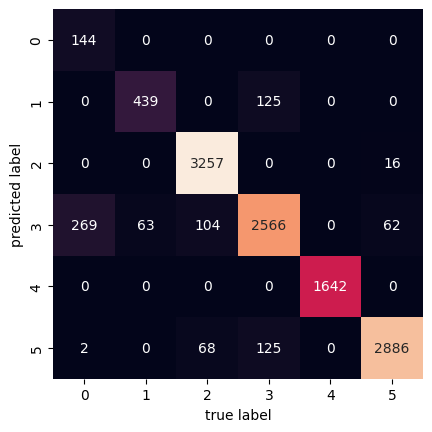

In [74]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
# DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(DT, X, y, cv = k)
result_y_pred = cross_val_predict(knn, X, y)

print("Avg accuracy: {}".format(result.mean()))

print(classification_report(y, result_y_pred))
cm = confusion_matrix(y , result_y_pred)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

1.0
[[ 24   0   0   0   0   0]
 [  0 117   0   0   0   0]
 [  0   0 639   0   0   0]
 [  0   0   0 614   0   0]
 [  0   0   0   0 342   0]
 [  0   0   0   0   0 618]]


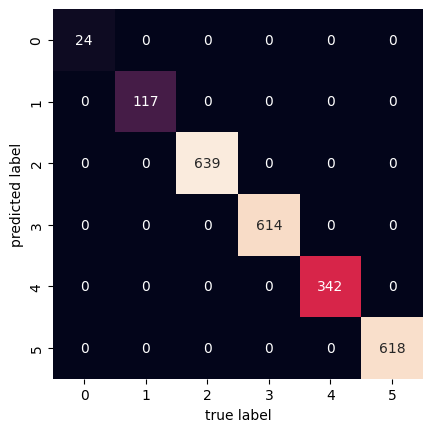

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()